# Housing clustering

**Step 0**: Import libraries and the dataset

In [29]:
# Install the packages from here because requirments's file dose't wotk.

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pickle


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pickle

In [9]:
url= 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)

**Step 1**: Explore the dataset

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df_raw.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8096,3.6923,45.0,5.084084,1.012012,1255.0,3.768769,33.81,-118.21,1.59700
14211,2.8500,38.0,5.089347,1.089347,1080.0,3.711340,32.68,-117.06,1.25800
14479,7.4351,18.0,8.448370,1.361413,949.0,2.578804,32.83,-117.24,4.45700
18710,1.4091,38.0,5.700000,1.146667,468.0,3.120000,40.57,-122.39,0.84400
16724,3.9063,18.0,5.740139,1.041763,1269.0,2.944316,35.47,-120.66,1.84800
7566,2.5321,37.0,4.344828,1.030853,2499.0,4.535390,33.89,-118.20,1.05100
50,0.9218,21.0,2.045662,1.034247,735.0,1.678082,37.82,-122.27,1.71900
20210,6.9483,18.0,7.167364,1.020921,690.0,2.887029,34.30,-119.23,4.04300
17084,2.8258,37.0,4.238671,1.114804,1587.0,4.794562,37.47,-122.20,2.32800
4233,8.4389,25.0,7.718447,1.058252,568.0,2.757282,34.11,-118.30,5.00001


In [12]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Subset only the variables that are going to be used in the model.

In [13]:
X_raw=df_raw[['Latitude','Longitude','MedInc']]

**Step 2**: Scalation

In [14]:
sc = StandardScaler()
X = sc.fit_transform(X_raw)

In [15]:
X[:10]

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       [ 1.03850269, -1.33781784,  0.93296751],
       [ 1.03850269, -1.33781784, -0.012881  ],
       [ 1.03850269, -1.33781784,  0.08744664],
       [ 1.03382082, -1.33781784, -0.11136631],
       [ 1.03382082, -1.33781784, -0.39513665],
       [ 1.03382082, -1.34280914, -0.94235915],
       [ 1.03382082, -1.33781784, -0.09446958]])

**Step 3** : Clusterization

In [16]:
clf=KMeans(n_clusters=6,random_state=408) # Define model
cluster=clf.fit(X)# fit model

In [17]:
df_clust=pd.DataFrame(np.append(X,cluster.labels_.reshape(-1,1),axis=1),columns=['Latitude','Longitude','MedInc','Clusters'])

In [18]:
df_clust['Clusters']=df_clust['Clusters'].astype('category')

In [19]:
centroide=pd.DataFrame(np.append(cluster.cluster_centers_,[[0],[1],[2],[3],[4],[5]],axis=1),columns=['Latitude','Longitude','MedInc','Clusters'])

In [20]:
print('Cluster of the first 10 observations')
df_clust.head(10)

Cluster of the first 10 observations


,Latitude,Longitude,MedInc,Clusters
0,1.052548,-1.327835,2.344766,0.0
1,1.043185,-1.322844,2.332238,0.0
2,1.038503,-1.332827,1.782699,0.0
3,1.038503,-1.337818,0.932968,0.0
4,1.038503,-1.337818,-0.012881,5.0
5,1.038503,-1.337818,0.087447,5.0
6,1.033821,-1.337818,-0.111366,5.0
7,1.033821,-1.337818,-0.395137,5.0
8,1.033821,-1.342809,-0.942359,5.0
9,1.033821,-1.337818,-0.094470,5.0


In [21]:
print("Centroide's coordenades of each cluster")
centroide.head(6)

Centroide's coordenades of each cluster


,Latitude,Longitude,MedInc,Clusters
0,0.972093,-1.189737,0.859328,0.0
1,-0.827887,0.770239,0.784964,1.0
2,0.229494,-0.079927,-0.657167,2.0
3,-0.849448,0.871934,-0.555650,3.0
4,-0.337342,0.161978,3.524350,4.0
5,1.271829,-1.161914,-0.551193,5.0


**Step 5:** Cluster visualization

In [22]:
df_clust.columns

Index(['Latitude', 'Longitude', 'MedInc', 'Clusters'], dtype='object')

<Figure size 720x1080 with 0 Axes>

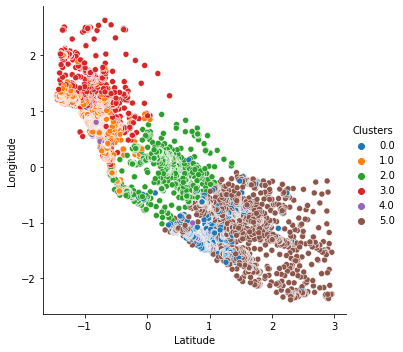

In [23]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Latitude",y="Longitude",hue="Clusters")
plt.show()

<Figure size 720x1080 with 0 Axes>

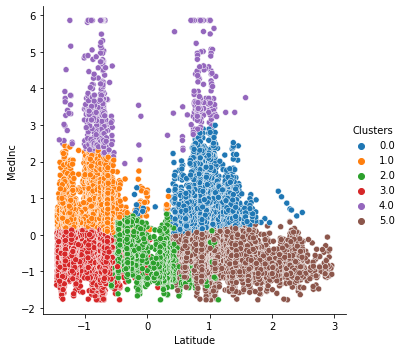

In [24]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Latitude",y="MedInc",hue="Clusters")
plt.show()

<Figure size 720x1080 with 0 Axes>

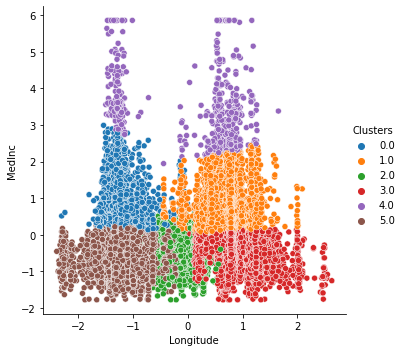

In [25]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Longitude",y="MedInc",hue="Clusters")
plt.show()

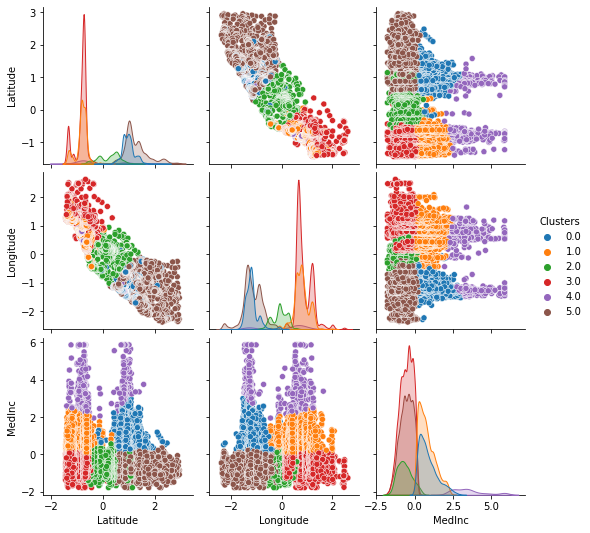

In [27]:
sns.pairplot(data=df_clust,hue='Clusters')
plt.show()

Looking at the longitude vs. latitude graph, 6 clusters are not identified, but I would think that there are 3. However, in the visualization of both variables one by one with the mean income, it is possible to see better the existence of 6 groups of households.

**Plus step**: Looking for the best K.

I have decided to test the 'Elbow Rule' to see if there are any 'K' that might improve the model.

Text(0.5, 1.0, 'Regla del codo')

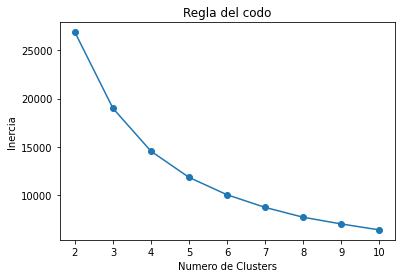

In [26]:
dist = []
clusters_centers = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 300,random_state = 408)
    _ = km.fit(X) 
    dist.append(km.inertia_)
    clusters_centers.append(km.cluster_centers_)
    
plt.plot(range(2, 11), dist, 'o-');
plt.ylabel('Inercia');
plt.xlabel('Numero de Clusters');
plt.title("Regla del codo")


Perhaps if we had run the model with 3 or 4 clusters, it would have performed better.

In [31]:
# Save the model as a pickle
filename = '../models/final_model.pkl'
pickle.dump(clf, open(filename,'wb'))